In [1]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [2]:
n_data = torch.ones(100, 2)
x0 = torch.normal(2 * n_data, 1)      # class0 x data (tensor), shape=(100, 2)
y0 = torch.zeros(100)                 # class0 y data (tensor), shape=(100, 1)
x1 = torch.normal(-2 * n_data, 1)     # class1 x data (tensor), shape=(100, 2)
y1 = torch.ones(100)                  # class1 y data (tensor), shape=(100, 1)

# merge x0, x1 to x. y0, y1 to y
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # shape (200, 2) FloatTensor = 32-bit floating
y = torch.cat((y0, y1), ).type(torch.LongTensor)    # shape (200,) LongTensor = 64-bit integer

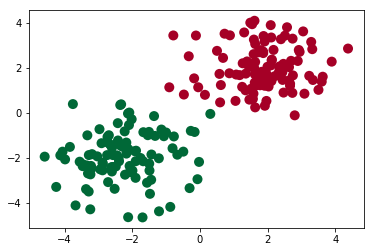

In [3]:
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

In [4]:
class Net(torch.nn.Module):
    def __init__(self, n_features, n_hidden, n_output):
        super(Net, self).__init__()
        # hidden layer (input_dim, output_dim)
        self.hidden = torch.nn.Linear(n_features, n_hidden)
        # output layer (input_dim, output_dim)
        self.predition = torch.nn.Linear(n_hidden, n_output)
        
    def forward(self, x):
        # build the NN
        h1 = F.relu(self.hidden(x)) # add af here
        out = F.softmax(self.predition(h1), dim=1)
        return out

In [5]:
"""
param 1: features(width, height)
param 2: neuron of hidden layer
param 3: classify output (y0 or y1)
"""
net = Net(2 ,10, 2)
print(net)

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (predition): Linear(in_features=10, out_features=2, bias=True)
)


In [6]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.1
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [7]:
"""
loss between label and prediction

e.g. 
label = [0  , 0  , 1  ]
pred  = [0.1, 0.2, 0.7]
"""
loss_func = torch.nn.CrossEntropyLoss()
print(loss_func)

CrossEntropyLoss()


In [8]:
plt.ion()

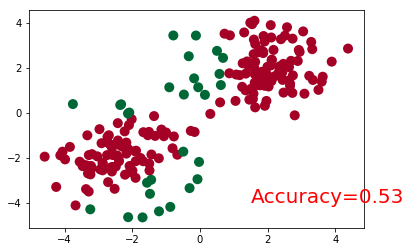

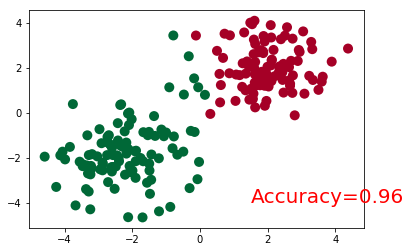

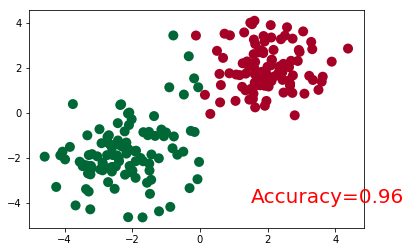

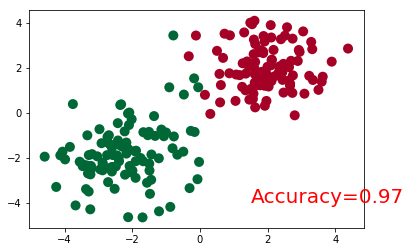

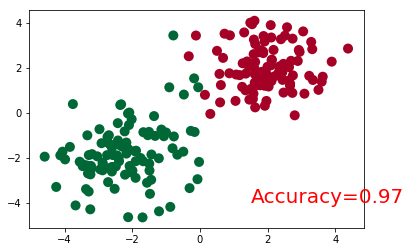

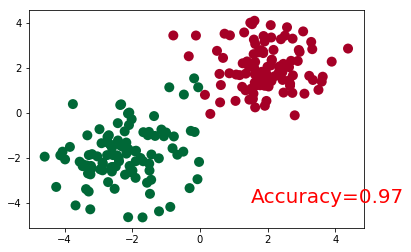

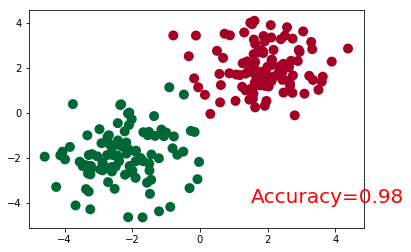

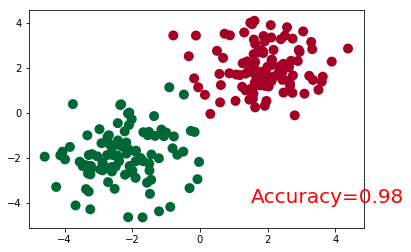

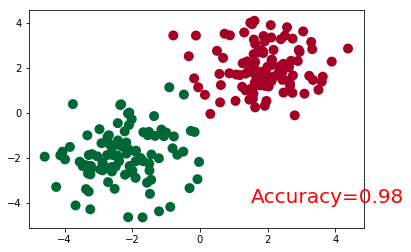

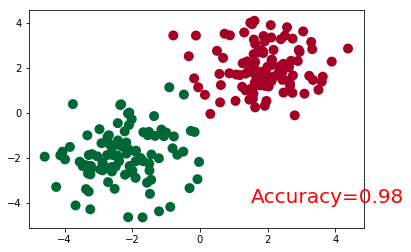

In [9]:
for i in range(20):
    y_hat = net(x)
    loss = loss_func(y_hat, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if i % 2 == 0:
        plt.cla()
        _, y_hat = torch.max(y_hat, dim=1)
        pred_y = y_hat.data.numpy().squeeze()  # remove dims with shape=1 (e.g.) (100, 1) -> (100,)
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y) / 200.
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.show()
        plt.pause(0.1)

plt.ioff()